In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-premium-prediction/insurance.csv


In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [4]:
data = pd.read_csv("/kaggle/input/insurance-premium-prediction/insurance.csv")

In [5]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [8]:
data.duplicated().sum()

1

In [9]:
datadf = data.copy()
datadf.drop_duplicates(inplace=True)

In [10]:
datadf['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [11]:
datadf['sex'].replace({'male':0,
                     'female':1}, inplace = True)

In [12]:
datadf['sex'].value_counts()

0    675
1    662
Name: sex, dtype: int64

In [13]:
datadf['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [14]:
datadf['smoker'].replace({'no':0,
                         'yes':1}, inplace=True)

In [15]:
datadf['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [16]:
datadf['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [17]:
import numpy as np
region_data = datadf.select_dtypes(exclude=np.number)

In [18]:
region_data_preprocessed = pd.get_dummies(region_data)

In [19]:
numerical_data_preprocessed = datadf.select_dtypes(include=np.number).drop(columns=["expenses"])
#numerical_data = datadf.select_dtypes(include=np.number).drop(columns=["expenses"])
#numerical_data.isna().sum()

In [20]:
#from sklearn.preprocessing import StandardScaler
#std_scale = StandardScaler()
#std_df = std_scale.fit_transform(numerical_data)
#std_df

In [21]:
#numerical_data_preprocessed = pd.DataFrame(std_df, columns=numerical_data.columns)

In [22]:
numerical_data_preprocessed

,age,sex,bmi,children,smoker
0,19,1,27.9,0,1
1,18,0,33.8,1,0
2,28,0,33.0,3,0
3,33,0,22.7,0,0
4,32,0,28.9,0,0
...,...,...,...,...,...
1333,50,0,31.0,3,0
1334,18,1,31.9,0,0
1335,18,1,36.9,0,0
1336,21,1,25.8,0,0


In [23]:
pre_processed_data = pd.concat([numerical_data_preprocessed,region_data_preprocessed,datadf['sex'],datadf['smoker']], axis = 1)

In [24]:
pre_processed_data.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
sex                 0
smoker              0
dtype: int64

In [25]:
X = pre_processed_data

In [26]:
Y = datadf["expenses"]

<AxesSubplot:>

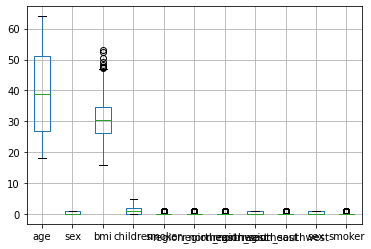

In [27]:
X.boxplot()

In [28]:
import seaborn as sns

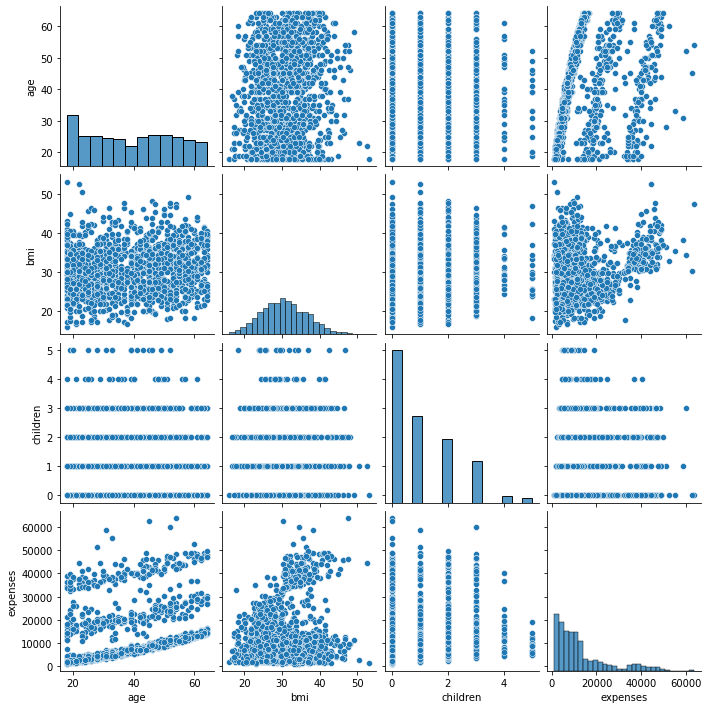

In [29]:
numdata = datadf.drop(columns=["sex","smoker","region"])
sns.pairplot(numdata)

<AxesSubplot:>

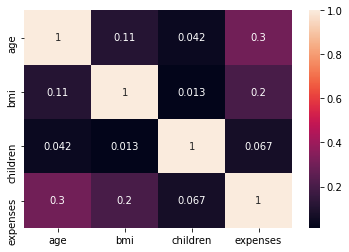

In [30]:

sns.heatmap(numdata.corr(), annot=True)

<AxesSubplot:>

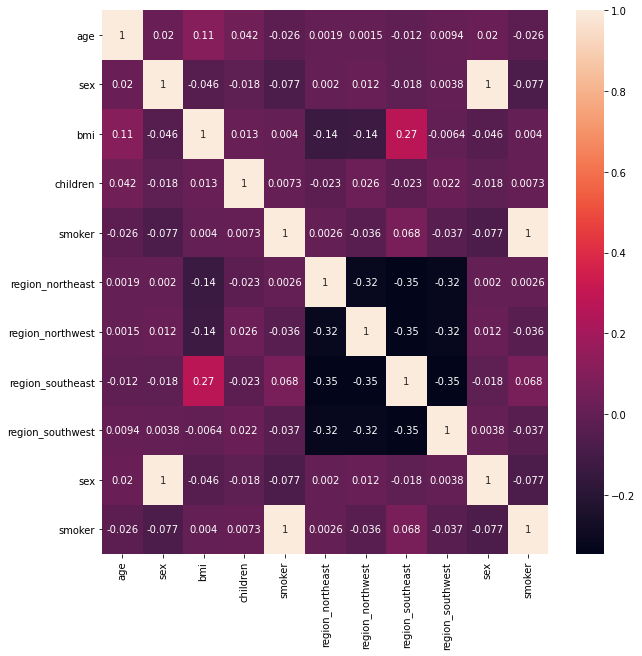

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(pre_processed_data.corr(), annot=True, ax=ax)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex',
       'smoker'],
      dtype='object')

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0                age   1.016815
1                sex        inf
2                bmi   1.106795
3           children   1.004014
4             smoker        inf
5   region_northeast   8.814023
6   region_northwest   8.841603
7   region_southeast  11.783109
8   region_southwest   9.439030
9                sex        inf
10            smoker        inf


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X,Y)

LinearRegression()

In [38]:
x_train, x_test, y_train , y_test = train_test_split(X, Y, test_size=0.3, random_state=90)

In [39]:
model.fit(x_train,y_train)
train_pred = model.predict(x_train)

In [40]:
#Y.shape
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [45]:
print("RMSE train: ", mean_squared_error(y_train, train_pred, squared=False))
print("RMSE test: ", mean_squared_error(y_test, test_pred, squared=False))

RMSE train:  6003.668182725241
RMSE test:  6147.50833445734


In [47]:
print("R2 Score train: ", r2_score(y_train, train_pred))
print("R2 Score test: ", r2_score(y_test, test_pred))

R2 Score train:  0.7421131611990173
R2 Score test:  0.7654143150577921


In [48]:
kf = KFold(n_splits=10)

In [65]:
test_results = []
ctr = 1
for train_idx, test_idx in kf.split(X):
    #print("train_idx: " , train_idx)
    #print("test_idx: " , test_idx)
    #print("train_x: " , train_x)
    train_x = X.iloc[train_idx]
    train_y = Y.iloc[train_idx]
    test_x = X.iloc[test_idx]
    test_y = Y.iloc[test_idx]
    model = LinearRegression()
    model.fit(train_x, train_y)
    y_train_pred = model.predict(train_x)
    y_test_pred = model.predict(test_x)
    
    train_mape = mean_squared_error(train_y, y_train_pred, squared=False)
    test_mape =  mean_squared_error(test_y, y_test_pred, squared=False)
    print("result: ", ctr)
    print("RMSE train: " , train_mape)
    print("RMSE test: " ,test_mape)
    ctr += 1
    test_results.append(test_mape)

result:  1
RMSE train:  6053.567853452595
RMSE test:  5976.3808187660425
result:  2
RMSE train:  6027.7705056823615
RMSE test:  6195.15861553852
result:  3
RMSE train:  6040.423273680541
RMSE test:  6087.760241446013
result:  4
RMSE train:  6021.7265931799675
RMSE test:  6271.606774409619
result:  5
RMSE train:  6028.586255035717
RMSE test:  6215.208253374315
result:  6
RMSE train:  6136.970083064357
RMSE test:  5156.528601883777
result:  7
RMSE train:  6097.462297476982
RMSE test:  5546.5657302638265
result:  8
RMSE train:  5932.412607127609
RMSE test:  6987.620772020897
result:  9
RMSE train:  6074.5542351328995
RMSE test:  5772.184955483714
result:  10
RMSE train:  5999.7899105014785
RMSE test:  6451.384985048639


In [66]:
np.mean(test_results)

6066.039974823537

In [67]:
np.std(test_results)

476.5404689396492

In [68]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, Y, scoring = 'neg_root_mean_squared_error', cv = 10)))

6066.039974823537

In [ ]:
def linear_best_fit(X,y):
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100



In [ ]:
linear_best_fit(X,Y)

In [ ]:
linear_best_fit(x_train,y_train)

In [ ]:
linear_best_fit(x_test,y_train)

In [ ]:
model.fit(x_train, y_train)